## Extract bubble from simulations

In [1]:
from bubble_tools import *
from experiment import *

/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [17]:
import matplotlib.pyplot as plt

plt.rcParams.update({'backend' : 'Qt5Agg'})
plt.rcParams.update({'text.usetex' : True})

plt.rcParams.update({'font.size' : 12.0})
plt.rcParams.update({'axes.titlesize' : 14.0})  # Font size of title
plt.rcParams.update({'axes.titlepad'  : 10.0})
plt.rcParams.update({'axes.labelsize' : 14.0})  # Axes label sizes
plt.rcParams.update({'axes.labelpad'  : 10.0})
plt.rcParams.update({'xtick.labelsize'  : 14.0})
plt.rcParams.update({'ytick.labelsize'  : 14.0})
plt.rcParams.update({'xtick.labelsize'  : 10.0})
plt.rcParams.update({'ytick.labelsize'  : 10.0})

plt.rcParams.update({'axes.spines.left'  : True})
plt.rcParams.update({'axes.spines.right'  : True})
plt.rcParams.update({'axes.spines.top'  : True})
plt.rcParams.update({'axes.spines.bottom'  : True})
plt.rcParams.update({'savefig.format'     : 'pdf'})
plt.rcParams.update({'savefig.bbox'       : 'tight'})
plt.rcParams.update({'savefig.pad_inches' : 0.1})
plt.rcParams.update({'pdf.compression' : 6})
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226'])

def ax_opts(ax):
    ax[0].axhline(phieq, color='darkgray', ls='--')
    ax[0].axhline(2.*np.pi, color='darkgray', ls='--') 
    ax[1].axvline(phieq, color='darkgray', ls='--')
    ax[1].axvline(2.*np.pi, color='darkgray', ls='--') 
    ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax[0].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$\phi$')
    ax[1].set_ylabel(r'$r$')
    ax[1].set_xlabel(r'$\phi$')
    for axx in ax:
        axx.legend()
        axx.grid()
    return ax

In [2]:
minSim = 0
maxSim = 4000

tmp      = 2
temp     = Tlist[tmp]
ph0      = phi0List[tmp]
sigmafld = fluct_stdev(m2eff, ph0, temp)
print(temp, ph0, m2eff, sigmafld, nTimeMAX)


0.12 1.7951958020513104 0.01 0.2804597482039711 32768


In [3]:
classify = False # quickly get an indea of decay rates
checks1 = False # verify visually that triage classified sims correctly
checks2 = False # verify visually that triage classified sims correctly
get_decayrate = False
get_energy = True
get_ps = True

pspec_path = './data/powspec_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)
en_path = './data/energy_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)

decay_too_fast_path = sims_that_decay_too_fast_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
do_not_decay_path   = sims_that_do_not_decay_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
good_decays_path    = sims_that_decay_fine_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)

if os.path.exists(good_decays_path+'.npy'):
    sims_fast_decayed = np.asarray(np.load(decay_too_fast_path + '.npy'))
    sims_notdecayed   = np.asarray(np.load(do_not_decay_path   + '.npy'))
    sims_decayed      = np.asarray(np.load(good_decays_path    + '.npy'))

    print(len(sims_fast_decayed[:,0]))
    print(len(sims_notdecayed[:,0]))
    print(len(sims_decayed[:,0]))


1499
255
2246


0.1 1.7951958020513104 0.01 0.23827857770296607 32768
0.11 1.7951958020513104 0.01 0.25986275091497074 32768
0.12 1.7951958020513104 0.01 0.2804597482039711 32768


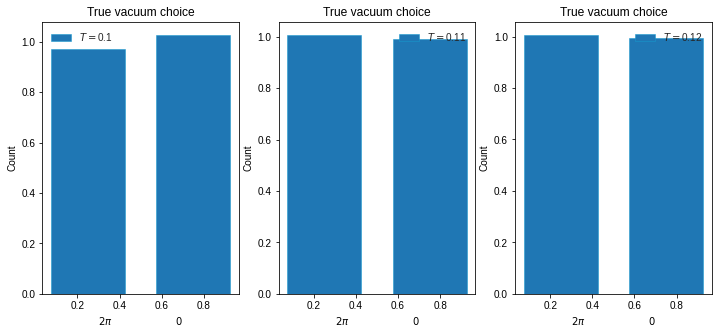

In [4]:
# Classify decays
if True:
    fig, ax = plt.subplots(1,3, figsize = (12,5))
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    for tmp, temp in enumerate(Tlist[:-1]):
        ph0      = phi0List[tmp]
        sigmafld = fluct_stdev(m2eff, ph0, temp)
        print(temp, ph0, m2eff, sigmafld, nTimeMAX)

        minSim = 0
        if tmp!=0: maxSim = 4000
        else: maxSim = 6000

        decay_too_fast_path = sims_that_decay_too_fast_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
        do_not_decay_path   = sims_that_do_not_decay_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
        good_decays_path    = sims_that_decay_fine_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)

        if os.path.exists(good_decays_path+'.npy'):
            sims_fast_decayed = np.asarray(np.load(decay_too_fast_path + '.npy'))
            sims_notdecayed   = np.asarray(np.load(do_not_decay_path   + '.npy'))
            sims_decayed      = np.asarray(np.load(good_decays_path    + '.npy'))

        outcomes = np.asarray(sims_decayed)[:,1]    

        ax[tmp].hist(outcomes, density=True, bins=2, rwidth=0.7, edgecolor='#169acf', linewidth=0.5, label=r'$T=$'+str(temp))
        ax[tmp].set_title('True vacuum choice')
        ax[tmp].set_xlabel(r'$2\pi \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; 0$')
        ax[tmp].set_ylabel('Count')
        ax[tmp].legend()
    plt.savefig('./data/thermal_vacuum_choice.pdf'); plt.show()

In [5]:
def decay_fit(t, t0, gamma):
    return - gamma * (t - t0)

def survive_prob(t_decay, num_samp):
    frac_remain = float(num_samp - t_decay.size)/float(num_samp)
    prob = 1. - np.linspace(1./num_samp, 1. - frac_remain, t_decay.size, endpoint=True)
    return prob

def lin_fit_times(times,tmin,tmax,o=1):
    """
    Given a collection of decay times, do a linear fit to
    the logarithmic survival probability between given times
    Input
      times : Times object (first index is array of decay times, 2nd is original number of samples
      tmin  : minimum time to fit inside
      tmax  : maximum time to fit inside
    """
    t = np.sort(times[0])
    p = np.log( survive_prob(times[0], times[1]))
    ii = np.where( (t>tmin) & (t<tmax) )
    return ii, np.polyfit(t[ii],p[ii],o)

In [6]:
if get_decayrate:
    emptdecaylist = []
    for sim, outcome in sims_decayed:
        path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
        if os.path.exists(path_clean_sim+'.npy'):
            real, sim, tdecay = np.asarray(np.load(path_clean_sim + '.npy'))
            emptdecaylist.append(tdecay)
    emptdecaylist = np.asarray(emptdecaylist)
    np.save('./data/tdecaylists_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)+'.npy', emptdecaylist)

/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


fit params: [-2.44903205e-05  2.05062319e-02] , # bubbles: 1902
fit params: [-2.80472902e-05 -1.39485314e-01] , # bubbles: 2273
fit params: [-3.90169131e-05 -3.60619152e-01] , # bubbles: 2233


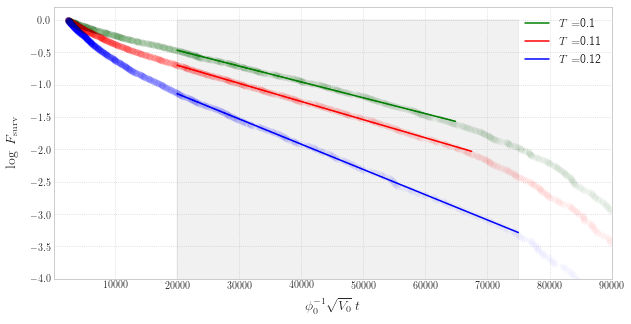

In [24]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols=['g', 'r', 'b']
for tmp, temp in enumerate(Tlist[:-1]):
    ph0      = phi0List[tmp]

    decayfile = './data/tdecaylists_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)
    if os.path.exists(decayfile+'.npy'):
        decaydata = np.load(decayfile+'.npy')
        decaydata = decaydata*dtout
        tdecays = [np.sort(np.asarray(decaydata)), len(decaydata)]  

        if tmp == 0:
            tmin = 20000#min(tdecays[0])
            tmax = 65000#max(tdecays[0])
        elif tmp == 1:
            tmin = 20000#min(tdecays[0])
            tmax = 67500#max(tdecays[0])
        else:
            tmin = 20000#min(tdecays[0])
            tmax = 75000#max(tdecays[0])
        tinds, jfit_times = lin_fit_times(tdecays, tmin, tmax, o=1)

        print('fit params:', jfit_times, ', # bubbles:', len(tdecays[0]))

        ax.plot(tdecays[0][tinds], (tdecays[0][tinds]*jfit_times[0]+jfit_times[1]), color=cols[tmp], ls='-', label=r'$T=$'+str(temp))
        ax.plot(tdecays[0][:-2], np.log(survive_prob(tdecays[0][:-2], tdecays[1])), color=cols[tmp], marker='o', ms=6, alpha=0.01)
    #    ax.plot(tdecays[0][tinds], np.exp(tdecays[0][tinds]*jfit_times[0]+jfit_times[1]), color=cols[tmp], ls='-', label=r'$T=$'+str(temp))
    #    ax.plot(tdecays[0], survive_prob(tdecays[0], tdecays[1]), color=cols[tmp], marker='o', alpha=0.01)
        ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        plt.fill_betweenx(np.log(survive_prob(tdecays[0], tdecays[1])), np.ones(tdecays[1])*(2e4), np.ones(tdecays[1])*(7.5e4), color='darkgray', alpha=0.05)
        ax.set_ylabel(r'$\log \; F_{\rm surv}$')
        ax.set_ylim((-4, 0.2))
        ax.set_xlim((100, 9e4))
        #ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.legend()
plt.grid(True, ls=':', color='lightgray')
plt.savefig('./data/thermal_decayrates.pdf')
plt.show()

In [30]:
nLat*dx

1581.1388300841897

In [29]:
nLat*dx * m2eff**0.5

158.11388300841898

In [22]:
tlist = [0]+np.linspace(1, nTimeMAX-1, 30).tolist()
tlist = np.asarray(tlist, dtype = 'int')
print(tlist)

if False:
    tmp = 0
    temp = Tlist[tmp]
    minSim = 0
    maxSim = 500
    div = 25#100
    simList = np.arange(minSim, maxSim+1 , div)

    divdata = np.asarray([(ii,jj) for ii,jj in zip(simList[:-1], simList[1:])])
    pspec_path = './data/powspec_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)
    en_path = './data/energy_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)

    allPS = np.empty(0)
    for (sima, simb) in divdata:
        pathPS = pspec_path+'_minsim'+str(sima)+'_maxSim'+str(simb)+'.npy'
        partPS = np.load(pathPS)
        allPS = np.concatenate((allPS,partPS))
    print(np.shape(allPS))
    np.save(pspec_path, allPS)

    if True:
        allEN = np.empty(0)
        for (sima, simb) in divdata:
            pathEN = en_path+'_minsim'+str(sima)+'_maxSim'+str(simb)+'.npy'
            partEN = np.load(pathEN)
            allEN = np.concatenate((allEN,partEN))
        print(np.shape(allEN))
        np.save(en_path, allEN)

[    0     1  1130  2260  3390  4520  5650  6780  7910  9039 10169 11299
 12429 13559 14689 15819 16948 18078 19208 20338 21468 22598 23728 24857
 25987 27117 28247 29377 30507 31637 32767]


(500,)
(31, 500, 512)
29
29


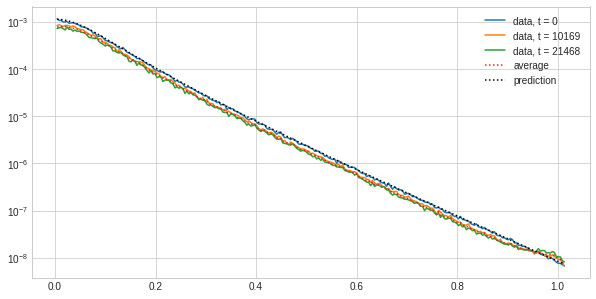

In [9]:
if os.path.exists(pspec_path+'.npy'):
    fftdata = np.load(pspec_path+'.npy')
    print(np.shape(fftdata))

    simavfftdata = np.empty((len(tlist), len(fftdata), nLat)); print(np.shape(simavfftdata))
    tMax = 0
    for sind in range(len(fftdata)):
        for tind, tt in enumerate(tlist):
            try:
                simavfftdata[tind,sind,:] = fftdata[sind][tind]#*nLat*4./lenLat
            except:
                if tind-1 > tMax:
                    tMax = tind-1
                    print(tMax)
                break
    print(tMax)
    simavfftdata = np.mean(simavfftdata, axis=1)

    aa = 1
    bb = knyq-1
    allps = np.nanmean(simavfftdata, axis=0)[aa:bb]
    klist2plot = klist[aa:bb]

    psth = pspec(m2eff, ph0, temp)[aa:bb]#*w2(lamb)[aa:bb]

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    for tind, tt in enumerate(tlist):
        if tind%10==0 and tind<=tMax:
            plt.plot(klist2plot, simavfftdata[tind][aa:bb], label='data, t = '+str(tt), ls='-')

    plt.plot(klist2plot, allps, label='average', ls=':')
    plt.plot(klist2plot, psth, ls=':', color='k', label='prediction')
    plt.yscale('log')
    plt.legend()
    plt.savefig('./data/powspec_evolution_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)+'.pdf')
    plt.show()

Sims in total: 500
(31, 500, 512)
29
1.5 1.7951958020513104 0.1


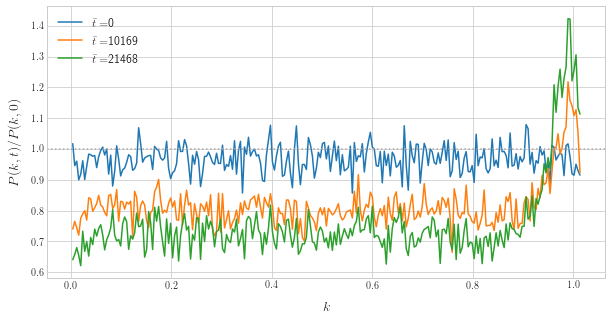

In [21]:
if os.path.exists(pspec_path+'.npy'):
    fftdata = np.load(pspec_path+'.npy')
    print('Sims in total:', len(fftdata))

    simavfftdata = np.empty((len(tlist), len(fftdata), nLat)); print(np.shape(simavfftdata))
    tMax = 0
    for sind in range(len(fftdata)):
        for tind, tt in enumerate(tlist):
            try:
                simavfftdata[tind,sind,:] = fftdata[sind][tind]
            except:
                if tind-1 > tMax:
                    tMax = tind-1
                break
    simavfftdata = np.mean(simavfftdata, axis=1)
    print(tMax)

    aa = 1
    bb = knyq-1
    allps = np.nanmean(simavfftdata, axis=0)[aa:bb]
    klist2plot = klist[aa:bb]

    print(lamb, ph0, temp)
    psth = pspec(m2eff, ph0, temp)[aa:bb]#*w2(lamb)[aa:bb]

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    for tind, tt in enumerate(tlist):
        if tind%10==0 and tind<=tMax:
            plt.plot(klist2plot, simavfftdata[tind][aa:bb]/psth, label=r'$\bar{t} = $'+str(tt), ls='-')

 #   plt.plot(klist2plot, allps/psth, label='average', ls='-')
    plt.axhline(1., ls=':', color='darkgray')
    plt.legend()
    plt.xlabel(r'$k$')
    plt.ylabel(r'$P(k, t)/P(k,0)$')
  #  plt.ylim((0,2))
  #  plt.yscale('log')
    plt.savefig('./data/powspec_evolution_temp'+str('%.4f'%temp)+'_phi0'+str('%.4f'%ph0)+'.pdf')
    plt.show()

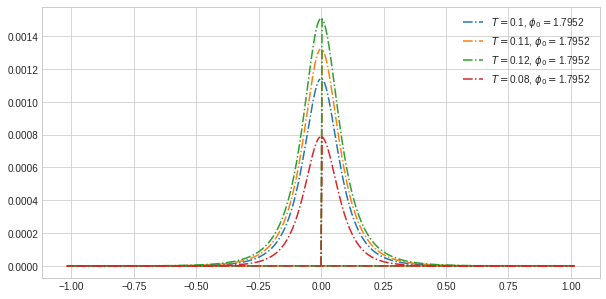

In [11]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
for ttmp, ttemp in enumerate(Tlist):
    pph0 = phi0List[ttmp]

    plt.plot(klist, pspec(m2eff, pph0, ttemp), ls='-.', label=r'$T=$'+str(ttemp)+r', $\phi_0=$'+str('%.4f'%pph0)) # th pow spec
plt.legend()
plt.show()

In [14]:
if False:
    if os.path.exists(en_path+'.npy'):
        energy_data = np.load(en_path+'.npy')
        print('Sims in total:', len(energy_data))

        for sim, energy in enumerate(energy_data):
            if sim%100==0:
                try:
                    print('sim', sim, 'initial energy', energy[0], 'final energy', energy[-1], 'std', np.std(energy))

                    plt.plot(energy, label='total')
                    plt.legend(); plt.show()
                except:
                    continue

In [13]:
# Note: where T=0.1, or order m, the field fluctuaitons are enough to effectively change the mass on the lattice. You see this in the power spectrum.
# Note: the energy conservation looks like it holds info about the nyquist frequency mode. The extent to which energy is conserved is proportional 
# to the amplitude of the rogue mode in the sectrum;
# eg: for vacuum spectrum, the nyquist frequency has non zero amp, while in the thermal spectrum, the exponential decay gives k_nyq \lim 0.
